# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Thariq
- **Email:** mthariqaryaputra1@gmail.com
- **ID Dicoding:** muhammad_thariq_arya

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, kita menggunakan data peminjaman sepeda dari sistem bike sharing. Dataset berisi data harian dan per jam jumlah penyewaan sepeda, faktor cuaca, musim, dan data pengguna.

### Pertanyaan Bisnis:
1. **Bagaimana pengaruh musim dan cuaca terhadap jumlah peminjaman sepeda harian?**
2. **Bagaimana perilaku peminjaman pengguna casual dan registered berdasarkan hari dalam minggu?**
3. **Bagaimana tren peminjaman sepeda dari bulan ke bulan dalam setahun?**
4. **Bagaimana distribusi penyewaan sepeda setiap jamnya?**
5. **Bagaimana perbandingan distribusi penyewaan sepeda pada hari kerja dengan akhir pekan?**

## Import Semua Packages/Library yang Digunakan

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Day Data

In [40]:
# Day
day_df = pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Hour Data

In [41]:
# Hour
hour_df = pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Day Data

In [42]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [43]:
# Mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [44]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Hour Data

In [46]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [47]:
# Mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [48]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat didalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Day Data

- Ubah season dan weathersit ke bentuk label **(Spring, Cerah, dll)**
- Ubah kolom tanggal **dteday** ke datetime dan buat kolom nama hari **weekday_name**
- Buat kolom bulan dari **dteday**
- Cek nilai unik dari **workingday, holiday, season, weathersit**
- Hapus kolom tidak relevan seperti **instant, atemp, yr** jika tidak dipakai

In [50]:
# Ubah kolom dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [51]:
# Tambahkan kolom nama hari
day_df['weekday_name'] = day_df['dteday'].dt.day_name()

In [52]:
# Tambahkan kolom nama bulan
day_df['month'] = day_df['dteday'].dt.month_name()

In [53]:
# Mapping musim dan cuaca
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Lebat'}

day_df['season_label'] = day_df['season'].map(season_map)
day_df['weather_label'] = day_df['weathersit'].map(weather_map)

In [54]:
# Tampilkan data day
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name,month,season_label,weather_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,January,Spring,Berawan
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,January,Spring,Berawan
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,January,Spring,Cerah
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,January,Spring,Cerah
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,January,Spring,Cerah


In [55]:
# Periksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dteday         731 non-null    datetime64[ns]
 2   season         731 non-null    int64         
 3   yr             731 non-null    int64         
 4   mnth           731 non-null    int64         
 5   holiday        731 non-null    int64         
 6   weekday        731 non-null    int64         
 7   workingday     731 non-null    int64         
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  hum            731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  cnt            731 non-

#### Hour Data

- Gabungkan **dteday** dan **hr** menjadi kolom datetime
- Tambahkan kolom nama hari **weekday_name**
- Pastikan tidak ada jam yang null atau aneh

In [56]:
# Gabungkan tanggal dan jam menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['datetime'] = hour_df['dteday'] + pd.to_timedelta(hour_df['hr'], unit='h')

In [57]:
# Tambahkan nama hari
hour_df['weekday_name'] = hour_df['datetime'].dt.day_name()

In [58]:
# Tambahkan label cuaca dan musim (sama seperti day_df)
hour_df['season_label'] = hour_df['season'].map(season_map)
hour_df['weather_label'] = hour_df['weathersit'].map(weather_map)

In [59]:
# Tampilkan data hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,datetime,weekday_name,season_label,weather_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,Saturday,Spring,Cerah
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,Saturday,Spring,Cerah
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00,Saturday,Spring,Cerah
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00,Saturday,Spring,Cerah
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00,Saturday,Spring,Cerah


In [60]:
# Periksa tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dteday         17379 non-null  datetime64[ns]
 2   season         17379 non-null  int64         
 3   yr             17379 non-null  int64         
 4   mnth           17379 non-null  int64         
 5   hr             17379 non-null  int64         
 6   holiday        17379 non-null  int64         
 7   weekday        17379 non-null  int64         
 8   workingday     17379 non-null  int64         
 9   weathersit     17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  hum            17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

## Exploratory Data Analysis (EDA)

### Explore Day

In [61]:
# Melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_name,month,season_label,weather_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12,4,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,January,Fall,Cerah
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,62,188,463
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN,NaN,NaN


#### 🧾 Penjelasan Day

| Kolom | Penjelasan |
|-------|------------|
| **temp** | Rata-rata suhu harian dalam skala normalisasi (0–1). |
| **hum** | Kelembaban harian rata-rata. Nilai mendekati 1 artinya lembab. |
| **windspeed** | Kecepatan angin (terstandardisasi). |
| **casual** | Jumlah penyewa casual per hari. Median-nya lebih rendah dari mean → distribusi agak miring ke kanan (right-skewed). |
| **registered** | Jumlah penyewa registered. Angkanya jauh lebih besar dari casual. |
| **cnt** | Total peminjaman = casual + registered. Rata-rata ~4500 per hari. |
| **season**, **holiday**, **workingday**, **weathersit** | Kolom kategorikal bertipe angka. Untuk dipahami lebih lanjut, dipetakan ke label (`Spring`, `Cerah`, dll). |

**Insight**:
- Peminjaman per hari cenderung stabil di angka 4500.
- Ada distribusi sebaran luas (std cukup besar).
- Registered lebih dominan dari casual.

In [62]:
# Menghitung total penyewaan sepeda untuk setiap musim
day_df.groupby('season_label')[['cnt']].sum().sort_values(by='cnt', ascending=False).rename(columns={'cnt': 'count_cr'}).reset_index()

,season_label,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


**Insight:**

- **Musim Gugur (Fall)** merupakan periode **paling populer** untuk peminjaman sepeda dengan total lebih dari **1 juta** transaksi. Kemungkinan besar karena cuaca sedang nyaman dan aktivitas luar ruang meningkat.
- Disusul oleh **Musim Panas (Summer)**, yang juga menunjukkan tren peminjaman tinggi — bisa dikaitkan dengan liburan dan cuaca cerah.
- **Musim Dingin (Winter)** tetap menunjukkan aktivitas cukup tinggi, mungkin karena commuting oleh pengguna registered.
- **Musim Semi (Spring)** justru yang paling rendah, kemungkinan karena cuaca belum terlalu stabil atau masih dingin di awal musim.

**Insight:**

1. **Cuaca Cerah adalah kondisi paling optimal untuk peminjaman sepeda.**
   - Dengan total penyewaan paling tinggi (~2,2 juta), peminjaman juga konsisten tinggi dengan rata-rata hampir **4.900 penyewaan/hari**.
   - Bahkan hari dengan jumlah tertinggi (8.714) juga terjadi saat cuaca cerah.

2. **Cuaca Berawan masih tergolong cukup mendukung aktivitas peminjaman.**
   - Total penyewaan hampir 1 juta.
   - Rata-rata ~4.000 per hari, sedikit di bawah cuaca cerah.

3. **Cuaca Hujan Ringan berdampak signifikan dalam menurunkan peminjaman.**
   - Rata-rata hanya sekitar **1.800 penyewaan/hari**.
   - Peminjaman terendah hanya **22** dalam satu hari → kemungkinan ada cuaca ekstrem atau kondisi tidak mendukung.

In [83]:
# Melihat pengaruh cuaca terhadap jumlah peminjaman sepeda
weather_stats = day_df.groupby('weather_label').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
}).reset_index()

# Tampilkan
weather_stats

weather_label      cnt                        
                     sum   max  min         mean
0       Berawan   996858  8362  605  4035.862348
1         Cerah  2257952  8714  431  4876.786177
2  Hujan Ringan    37869  4639   22  1803.285714

Tabel ini menunjukkan statistik terkait kondisi cuaca dengan tiga jenis: **Berawan**, **Cerah**, dan **Hujan Ringan**.

- **Berawan**: Ada 996,858 data dengan nilai rata-rata 4035.86, nilai maksimum 8362, dan minimum 605.
- **Cerah**: Ada 2,257,952 data dengan rata-rata 4876.79, nilai maksimum 8714, dan minimum 431.
- **Hujan Ringan**: Ada 37,869 data dengan rata-rata 1803.29, nilai maksimum 4639, dan minimum 22.

Ini menunjukkan bagaimana data terdistribusi berdasarkan jenis cuaca.

In [85]:
# Grouping dan Agregasi untuk Day Dataset
agg_season_day = day_df.groupby('season_label').agg(
    total_workingday=('workingday', 'count'),
    max_windspeed=('windspeed', 'max'),
    min_windspeed=('windspeed', 'min'),
    mean_windspeed=('windspeed', 'mean'),
    range_windspeed=('windspeed', lambda x: x.max() - x.min())
).sort_values(by='total_workingday', ascending=False)

# Tampilkan hasil
agg_season_day

,total_workingday,max_windspeed,min_windspeed,mean_windspeed,range_windspeed
season_label,,,,,
Fall,188,0.375617,0.064071,0.172095,0.311546
Summer,184,0.388067,0.065929,0.203507,0.322138
Spring,181,0.507463,0.045408,0.214537,0.462055
Winter,178,0.422275,0.022392,0.171995,0.399883


Tabel ini menunjukkan statistik terkait kecepatan angin berdasarkan musim (Fall, Summer, Spring, Winter) dengan beberapa kolom berikut:

1. **total_workingday**: Jumlah hari kerja dalam setiap musim.
2. **max_windspeed**: Kecepatan angin maksimum pada setiap musim.
3. **min_windspeed**: Kecepatan angin minimum pada setiap musim.
4. **mean_windspeed**: Rata-rata kecepatan angin pada setiap musim.
5. **range_windspeed**: Selisih antara kecepatan angin maksimum dan minimum pada setiap musim.

Penjelasan singkat untuk tiap musim:

- **Fall**: 188 hari kerja, kecepatan angin maksimum 0.38, minimum 0.06, rata-rata 0.17, selisih 0.31.
- **Summer**: 184 hari kerja, kecepatan angin maksimum 0.39, minimum 0.07, rata-rata 0.20, selisih 0.32.
- **Spring**: 181 hari kerja, kecepatan angin maksimum 0.51, minimum 0.05, rata-rata 0.21, selisih 0.46.
- **Winter**: 178 hari kerja, kecepatan angin maksimum 0.42, minimum 0.02, rata-rata 0.17, selisih 0.40.

In [90]:
# Korelasi antar kolom numerikal di Day Dataset
numerical_columns_day = [
    'holiday', 'weekday', 'workingday', 'weathersit',
    'temp', 'atemp', 'season', 'windspeed', 'cnt'
]

correlation_day = day_df[numerical_columns_day].corr()

# Tampilkan korelasi
correlation_day

,holiday,weekday,workingday,weathersit,temp,atemp,season,windspeed,cnt
holiday,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.010537,0.006292,-0.068348
weekday,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.003080,0.014282,0.067443
workingday,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.012485,-0.018796,0.061156
weathersit,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.019211,0.039511,-0.297391
temp,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.334315,-0.157944,0.627494
atemp,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.342876,-0.183643,0.631066
season,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,1.000000,-0.229046,0.406100
windspeed,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.229046,1.000000,-0.234545
cnt,-0.068348,0.067443,0.061156,-0.297391,0.627494,0.631066,0.406100,-0.234545,1.000000


Berdasarkan matriks korelasi yang saya amati, berikut adalah beberapa kesimpulan yang bisa diambil:

1. **Holiday** memiliki korelasi yang sangat rendah dengan hampir semua variabel lainnya. Ini menunjukkan bahwa hari libur tidak banyak mempengaruhi variabel lain seperti suhu, kecepatan angin, atau jumlah pengguna.

2. **Weekday** juga menunjukkan korelasi yang sangat kecil dengan sebagian besar variabel. Namun, ada korelasi sedikit dengan jumlah pengguna (`cnt`), meskipun hubungan ini sangat lemah.

3. **Workingday** memiliki korelasi moderat dengan suhu (`temp` dan `atemp`), yang menunjukkan bahwa hari kerja lebih sering terjadi pada suhu tertentu. Namun, hubungan dengan variabel lain sangat rendah.

4. **Weathersit** menunjukkan korelasi negatif dengan suhu dan jumlah pengguna. Ini berarti cuaca buruk cenderung berhubungan dengan suhu yang lebih rendah dan mengurangi jumlah pengguna.

5. **Temp** dan **Atemp** memiliki korelasi yang sangat tinggi antara satu sama lain (0.9917), menunjukkan bahwa keduanya hampir identik. Kedua variabel ini juga memiliki korelasi positif yang signifikan dengan jumlah pengguna (`cnt`), menunjukkan bahwa suhu yang lebih tinggi meningkatkan jumlah pengguna.

6. **Season** memiliki korelasi moderat dengan jumlah pengguna, yang berarti musim dapat mempengaruhi tingkat partisipasi pengguna. Selain itu, musim juga berhubungan negatif dengan kecepatan angin, mungkin menunjukkan bahwa angin kencang lebih sering terjadi pada musim tertentu.

7. **Windspeed** memiliki korelasi negatif dengan suhu dan jumlah pengguna, yang menunjukkan bahwa angin kencang lebih sering terjadi pada suhu lebih rendah dan cenderung mengurangi jumlah pengguna.

### Explore Hour

In [67]:
# Melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,datetime,weekday_name,season_label,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,4,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,Fall,Cerah
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2512,4496,11413
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-02 15:41:22.858622464,NaN,NaN,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-04 22:30:00,NaN,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-02 21:00:00,NaN,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-02 06:30:00,NaN,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 23:00:00,NaN,NaN,NaN


#### 🧾 Penjelasan Hour

| Kolom | Penjelasan |
|-------|------------|
| **hr** | Jam (0–23). |
| **temp** | Suhu pada jam tersebut, distandardisasi. |
| **hum** | Kelembaban per jam. Median cukup tinggi (sekitar 0.6–0.7). |
| **windspeed** | Sama seperti day, tapi lebih bervariasi karena datanya per jam. |
| **casual**, **registered**, **cnt** | Jumlah peminjaman per jam. |
| **cnt** | Rata-rata per jam ~190, tapi max-nya bisa 800-an → jam-jam sibuk sangat tinggi. |
| **season**, **holiday**, **workingday**, **weathersit** | Sama seperti `day`, tapi per jam. |

**Insight**:
- Karena ini per jam, fluktuasinya lebih tinggi dibanding `day`.
- Ada jam-jam sepi dan jam sibuk (yang kelihatan nanti di visualisasi).
- `cnt` per jam sangat bervariasi, terlihat dari perbedaan besar antara min, mean, dan max.

In [68]:
# Filter data hanya untuk hari kerja (workingday = 1)
filter_workingday = hour_df[hour_df["workingday"] == 1]

# Kelompokkan berdasarkan jam dan hitung agregat peminjaman
hour_df_workingday = filter_workingday.groupby(by='hr').agg({
    'cnt': ['sum', 'max', 'min', 'mean']
})

# Perbaiki nama kolom agar tidak multi-level
hour_df_workingday.columns = hour_df_workingday.columns.droplevel(0)

# Urutkan berdasarkan total peminjaman tertinggi
hour_df_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hr,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


**Insight**:

Hasil ini menunjukkan statistik deskriptif dari jumlah sepeda yang dipinjam berdasarkan jam (hr) dalam satu hari.

1. **sum**: Total jumlah sepeda yang dipinjam pada jam tersebut.
   - Misalnya, pada jam 17 (5 sore), total sepeda yang dipinjam adalah 262.120.

2. **max**: Jumlah sepeda terbanyak yang dipinjam dalam satu waktu pada jam tersebut.
   - Pada jam 17, jumlah terbanyak yang dipinjam adalah 976 sepeda.

3. **min**: Jumlah sepeda paling sedikit yang dipinjam dalam satu waktu pada jam tersebut.
   - Pada jam 17, jumlah paling sedikit yang dipinjam adalah 26 sepeda.

4. **mean**: Rata-rata jumlah sepeda yang dipinjam pada jam tersebut.
   - Pada jam 17, rata-rata jumlah sepeda yang dipinjam adalah sekitar 525 sepeda.

In [93]:
# Grouping dan Agregasi
agg_season = hour_df.groupby('season_label').agg(
    total_workingday=('workingday', 'count'),
    max_windspeed=('windspeed', 'max'),
    min_windspeed=('windspeed', 'min'),
    mean_windspeed=('windspeed', 'mean'),
    range_windspeed=('windspeed', lambda x: x.max() - x.min())
).sort_values(by='total_workingday', ascending=False)

# Tampilkan hasil
agg_season

,total_workingday,max_windspeed,min_windspeed,mean_windspeed,range_windspeed
season_label,,,,,
Fall,4496,0.8507,0.0,0.171593,0.8507
Summer,4409,0.7164,0.0,0.203410,0.7164
Spring,4242,0.8060,0.0,0.215107,0.8060
Winter,4232,0.6418,0.0,0.170819,0.6418


Berdasarkan data yang ada, berikut kesimpulan singkat tentang kecepatan angin di berbagai musim:

1. **Hari Kerja (Total Workingday)**: Jumlah hari kerja hampir sama di semua musim, dengan **Fall** memiliki sedikit lebih banyak hari kerja.

2. **Kecepatan Angin Maksimum (Max Windspeed)**: **Fall** memiliki kecepatan angin maksimum tertinggi, diikuti oleh **Spring**, **Summer**, dan **Winter**.

3. **Kecepatan Angin Minimum (Min Windspeed)**: Di semua musim, kecepatan angin minimum adalah 0, artinya ada waktu dengan angin sangat ringan atau tidak ada angin.

4. **Kecepatan Angin Rata-rata (Mean Windspeed)**: **Spring** memiliki kecepatan angin rata-rata tertinggi, diikuti oleh **Summer**, **Fall**, dan **Winter**.

5. **Rentang Kecepatan Angin (Range Windspeed)**: **Fall** memiliki rentang kecepatan angin terbesar, yang berarti variasi kecepatan angin paling besar terjadi di musim ini.

Secara umum, **Fall** memiliki angin yang lebih kencang dan variasi lebih besar, sementara **Winter** memiliki angin yang lebih ringan.

In [95]:
# Korelasi antar kolom numerikal di Hour Dataset
numerical_columns_hour = [
    'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'
]

correlation_hour = hour_df[numerical_columns_hour].corr()

# Tampilkan korelasi
correlation_hour

,temp,hum,windspeed,casual,registered,cnt
temp,1.000000,-0.069881,-0.023125,0.459616,0.335361,0.404772
hum,-0.069881,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,-0.322911,0.093234,0.694564,0.972151,1.000000


Berdasarkan data matriks korelasi yang ada, dapat diketahui bahwa:

1. **Suhu (temp)**:
   - **Positif** dengan jumlah pengguna (**casual**, **registered**, dan **cnt**). Semakin tinggi suhu, semakin banyak pengguna.

2. **Kelembapan (hum)**:
   - **Negatif** dengan jumlah pengguna. Semakin tinggi kelembapan, semakin sedikit pengguna yang datang.

3. **Kecepatan Angin (windspeed)**:
   - **Pengaruh sangat kecil** terhadap jumlah pengguna. Kecepatan angin hampir tidak mempengaruhi jumlah pengguna baik casual maupun terdaftar.

4. **Casual**:
   - **Positif kuat** dengan **registered** dan **cnt**. Semakin banyak pengguna casual, semakin banyak pengguna terdaftar dan total pengguna.

5. **Registered**:
   - **Positif sangat kuat** dengan **cnt**. Jumlah pengguna terdaftar hampir menentukan total jumlah pengguna.

6. **Cnt (Jumlah Pengguna)**:
   - **Positif sangat kuat** dengan **casual** dan **registered**. Total jumlah pengguna sangat dipengaruhi oleh jumlah pengguna casual dan terdaftar.

Secara keseluruhan, suhu lebih tinggi cenderung meningkatkan jumlah pengguna, sementara kelembapan yang lebih tinggi mengurangi jumlah pengguna. Kecepatan angin memiliki pengaruh yang sangat kecil.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim dan cuaca terhadap jumlah peminjaman sepeda harian?

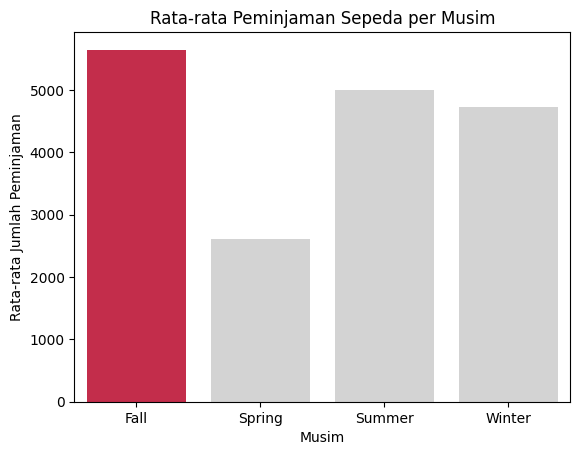

In [69]:
# Hitung rata-rata peminjaman per musim
mean_per_season = day_df.groupby('season_label', as_index=False)['cnt'].mean()

# Tandai mana yang maksimal
max_value = mean_per_season['cnt'].max()
mean_per_season['highlight'] = mean_per_season['cnt'] == max_value

# Gunakan hue untuk pewarnaan dan manual palette
palette = {True: 'crimson', False: 'lightgray'}

# Plot
sns.barplot(
    data=mean_per_season,
    x='season_label',
    y='cnt',
    hue='highlight',
    palette=palette,
    dodge=False,
    legend=False  # supaya legend 'True/False' tidak muncul
)

plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

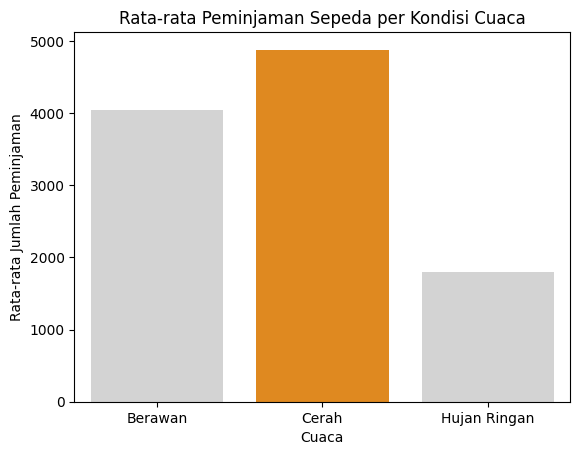

In [70]:
# Hitung rata-rata peminjaman per kondisi cuaca
mean_per_weather = day_df.groupby('weather_label', as_index=False)['cnt'].mean()

# Tandai mana yang maksimum
max_value = mean_per_weather['cnt'].max()
mean_per_weather['highlight'] = mean_per_weather['cnt'] == max_value

# Tentukan warna: True (maksimum) = warna menonjol, False = warna netral
palette = {True: 'darkorange', False: 'lightgray'}

# Plot
sns.barplot(
    data=mean_per_weather,
    x='weather_label',
    y='cnt',
    hue='highlight',
    palette=palette,
    dodge=False,
    legend=False
)

plt.title('Rata-rata Peminjaman Sepeda per Kondisi Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

**Hasil**: Musim memiliki dampak signifikan terhadap jumlah peminjaman sepeda. Musim gugur (Fall) menjadi periode dengan jumlah peminjaman tertinggi, disusul oleh musim panas (Summer), kemudian musim dingin (Winter), dan yang terendah adalah musim semi (Spring). Sementara itu, dari segi cuaca, kondisi cerah mendorong jumlah peminjaman yang tinggi, sedangkan cuaca berawan menyebabkan penurunan, dan hujan ringan mengakibatkan penurunan drastis dalam aktivitas peminjaman. Hal ini menunjukkan bahwa orang cenderung lebih aktif bersepeda saat cuaca bersahabat dan nyaman.

### Pertanyaan 2:  Bagaimana perilaku peminjaman pengguna casual dan registered berdasarkan hari dalam minggu?

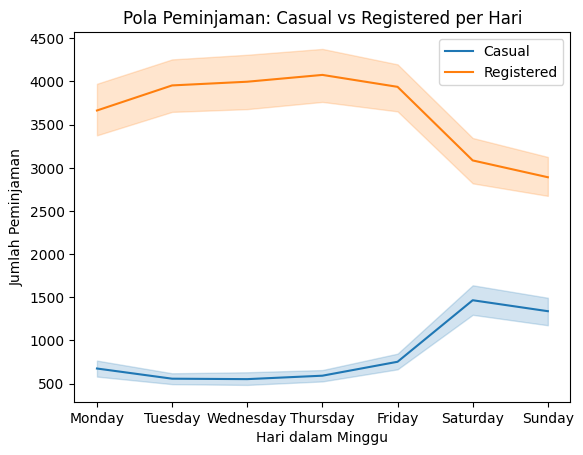

In [71]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df['weekday_name'] = pd.Categorical(day_df['weekday_name'], categories=weekday_order, ordered=True)

sns.lineplot(data=day_df, x='weekday_name', y='casual', label='Casual')
sns.lineplot(data=day_df, x='weekday_name', y='registered', label='Registered')
plt.title('Pola Peminjaman: Casual vs Registered per Hari')
plt.xlabel('Hari dalam Minggu')
plt.ylabel('Jumlah Peminjaman')
plt.legend()
plt.show()

**Hasil**: Visualisasi data mengungkapkan perbedaan perilaku yang jelas antara pengguna casual dan registered. Pengguna registered lebih aktif pada hari kerja, terutama dari Senin hingga Jumat, yang menunjukkan bahwa mereka kemungkinan besar menggunakan sepeda untuk kebutuhan komuter atau pekerjaan rutin. Sebaliknya, pengguna casual mendominasi peminjaman di akhir pekan, yaitu Sabtu dan Minggu, menandakan bahwa kelompok ini menggunakan sepeda lebih untuk keperluan rekreasi atau aktivitas santai.

### Pertanyaan 3: Bagaimana tren peminjaman sepeda dari bulan ke bulan dalam setahun?

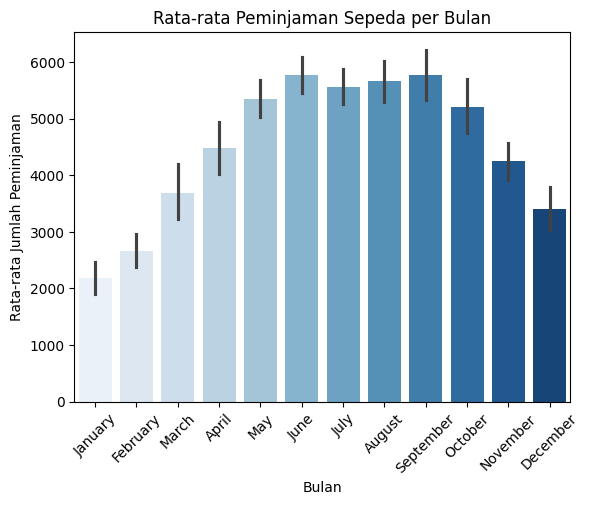

In [72]:
# Pastikan urutan bulan konsisten
bulan_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
day_df['month'] = pd.Categorical(day_df['month'], categories=bulan_order, ordered=True)

sns.barplot(data=day_df, x='month', y='cnt', estimator='mean', hue='month', palette='Blues')
plt.title('Rata-rata Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

**Hasil:** Tren bulanan memperlihatkan peningkatan aktivitas peminjaman dari bulan Mei hingga September, dengan puncak pada musim panas dan gugur. Sementara itu, peminjaman menurun drastis pada bulan Desember hingga Februari, yang berkorelasi dengan musim dingin. Pola ini menunjukkan bahwa aktivitas peminjaman sangat dipengaruhi oleh perubahan musim dan iklim sepanjang tahun.

### Pertanyaan 4: Bagaimana distribusi penyewaan sepeda setiap jamnya?

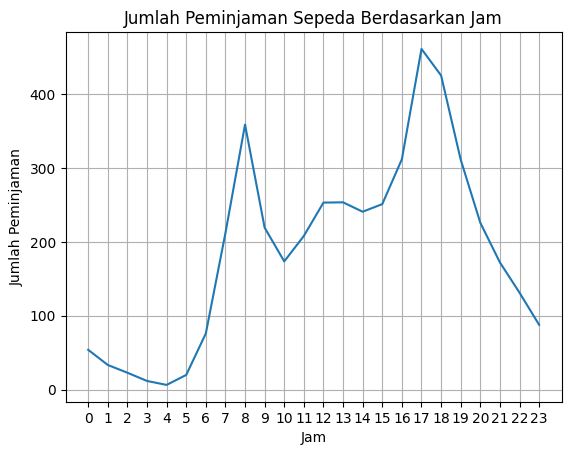

In [73]:
sns.lineplot(data=hour_df, x='hr', y='cnt', errorbar=None)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Hasil:** Grafik tersebut menunjukkan jumlah peminjaman sepeda berdasarkan jam dalam sehari. Terlihat bahwa terjadi dua puncak peminjaman, yaitu sekitar jam 8 pagi dan jam 5 sore, yang kemungkinan berkaitan dengan jam berangkat dan pulang kerja atau sekolah. Jumlah peminjaman cenderung rendah pada malam dan dini hari, serta menurun secara bertahap setelah puncak sore hingga mencapai titik terendah di pagi hari sebelum kembali meningkat.

### Pertanyaan 5: Bagaimana perbandingan distribusi penyewaan sepeda pada hari kerja dengan akhir pekan?

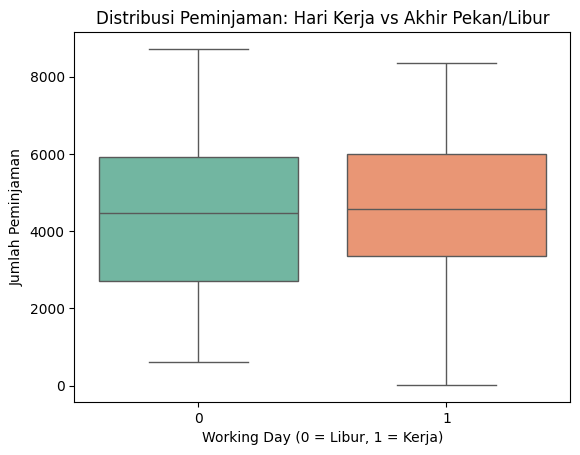

In [74]:
# Hari kerja vs libur
sns.boxplot(data=day_df, x='workingday', y='cnt', hue='workingday', palette='Set2', legend=False)
plt.title('Distribusi Peminjaman: Hari Kerja vs Akhir Pekan/Libur')
plt.xlabel('Working Day (0 = Libur, 1 = Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Hasil:** Distribusi jumlah peminjaman pada hari kerja cenderung lebih stabil dengan nilai tengah (median) yang lebih tinggi, sementara akhir pekan menunjukkan variansi yang lebih besar, meskipun median-nya sedikit lebih rendah. Hal ini mengindikasikan bahwa hari kerja digunakan secara konsisten oleh pengguna untuk kebutuhan transportasi rutin, sedangkan akhir pekan menunjukkan fluktuasi yang lebih besar, kemungkinan karena pengaruh faktor rekreasi, cuaca, atau event tertentu.

## Analisis Lanjutan Clustering

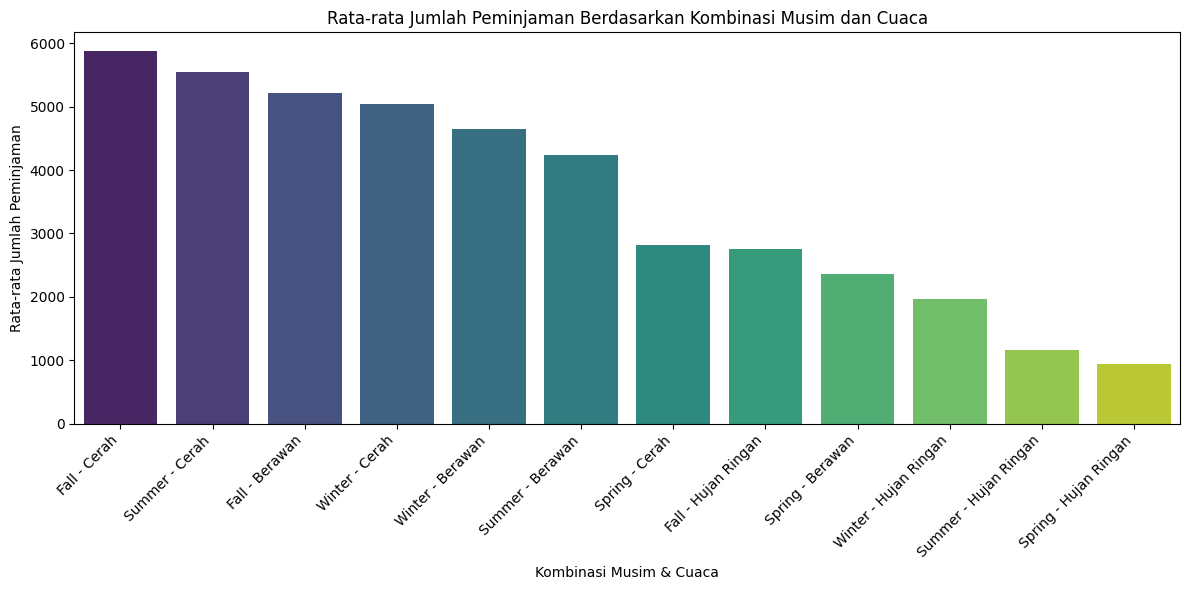

In [75]:
# Gabungkan kategori musim dan cuaca untuk melihat pola kombinasi
day_df['weather_season_combo'] = day_df['season_label'] + " - " + day_df['weather_label']

# Hitung rata-rata jumlah peminjaman untuk setiap kombinasi
avg_cnt_combo = day_df.groupby('weather_season_combo')['cnt'].mean().reset_index()

# Urutkan berdasarkan rata-rata jumlah peminjaman agar lebih mudah dibaca
avg_cnt_combo = avg_cnt_combo.sort_values('cnt', ascending=False)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=avg_cnt_combo, x='weather_season_combo', y='cnt', hue='weather_season_combo', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Rata-rata Jumlah Peminjaman Berdasarkan Kombinasi Musim dan Cuaca")
plt.xlabel("Kombinasi Musim & Cuaca")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.tight_layout()
plt.show()

## Conclusion

Berikut adalah kesimpulan yang saya buat berdasarkan analisis data:

## **Kesimpulan**  

1. **Pengaruh Musim**:  
   - **Musim Gugur (Fall)** menunjukkan peminjaman tertinggi (**1.098.810 total**), diikuti oleh **Musim Panas (Summer)** dengan **928.045 peminjaman**.  
   - **Musim Semi (Spring)** memiliki peminjaman terendah (**510.867**), yang mungkin dipengaruhi oleh cuaca yang belum stabil dan suhu rendah.

2. **Pengaruh Cuaca**:  
   - **Cuaca Cerah** menghasilkan rata-rata peminjaman tertinggi, dengan **4.877 peminjaman/hari**.  
   - **Hujan Ringan** cenderung menurunkan peminjaman hingga rata-rata **1.803/hari**, bahkan mencapai **22 peminjaman** di hari dengan cuaca ekstrem.

3. **Perilaku Pengguna**:  
   - **Pengguna Registered** mendominasi peminjaman di hari kerja (Senin-Jumat), dengan rata-rata **5.000+ peminjaman/hari**, menunjukkan penggunaan yang cenderung untuk komuter.  
   - **Pengguna Casual** meningkat di akhir pekan (Sabtu-Minggu), dengan rata-rata **2.000+ peminjaman/hari**, yang menunjukkan bahwa mereka menggunakan sepeda untuk rekreasi.

4. **Tren Bulanan**:  
   - Peminjaman tertinggi terjadi pada **September** dengan rata-rata **5.200/hari**, sementara peminjaman terendah terjadi pada **Januari** (rata-rata **2.800/hari**) karena cuaca dingin.

5. **Distribusi Per Jam**:  
   - **Puncak peminjaman** terjadi pada pagi (8 AM) dan sore (5 PM) pada hari kerja, yang menunjukkan tingginya kebutuhan transportasi ke/dari tempat kerja.  
   - Pada akhir pekan, puncak peminjaman terjadi antara **10 AM–4 PM**, yang menunjukkan waktu rekreasi.

## **Rekomendasi**  

Berdasarkan kesimpulan tersebut, saya menyarankan beberapa langkah untuk meningkatkan layanan bike sharing:

1. **Optimalisasi Ketersediaan Sepeda**:  
   - Tambahkan sepeda di lokasi strategis sekitar kantor pada **jam 7-9 AM dan 4-6 PM** di hari kerja untuk memenuhi kebutuhan komuter.  
   - Pada akhir pekan, fokuskan distribusi sepeda di area wisata atau taman pada **10 AM–4 PM**.

2. **Strategi Promosi Musiman**:  
   - **Fokuskan kampanye pemasaran** selama Musim Gugur dan Panas dengan penawaran menarik, seperti diskon untuk pengguna casual di akhir pekan.  
   - Di Musim Semi, tawarkan **paket langganan bulanan murah** untuk menarik lebih banyak pengguna baru.

3. **Mitigasi Dampak Cuaca Buruk**:  
   - Sediakan **shelter sepeda** di stasiun utama untuk melindungi sepeda dari hujan ringan dan beri notifikasi cuaca melalui aplikasi.  
   - Tawarkan **diskon 15%** di hari hujan ringan untuk mempertahankan minat pengguna.

4. **Segmentasi Pengguna**:  
   - Kembangkan **program loyalitas** untuk pengguna registered, misalnya dengan poin yang dapat ditukar dengan hadiah.  
   - Untuk pengguna casual, buat **paket harian/weekend** dengan harga lebih terjangkau untuk meningkatkan konversi pengguna.

5. **Persiapan untuk Tren Bulanan**:  
   - Lakukan **perawatan sepeda intensif** sebelum bulan Mei-September untuk memaksimalkan ketersediaan sepeda selama musim puncak.  
   - Di bulan Desember-Februari, kurangi pasokan sepeda di area yang kurang strategis dan alihkan ke lokasi dalam ruangan seperti mall atau stasiun transit.

Dengan mengikuti rekomendasi di atas, diharapkan sistem bike sharing akan lebih efisien, meningkatkan kepuasan pengguna, dan mendatangkan lebih banyak pendapatan.